 ## importing the libiaries

Data Description
The client will send data in multiple sets of files in batches at a given location. The data has been extracted from the census bureau. 
The data contains 32561 instances with the following attributes:
Features:

    1. LIMIT_BAL: continuous.Credit Limit of the person.
    2. SEX: Categorical: 1 = male; 2 = female
    3. EDUCATION: Categorical: 1 = graduate school; 2 = university; 3 = high school; 4 = others
    4. MARRIAGE: 1 = married; 2 = single; 3 = others
    5. AGE-num: continuous. 
    6. PAY_0 to PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005)
    7. BILL_AMT1 to BILL_AMT6: Amount of bill statements.
    8. PAY_AMT1 to PAY_AMT6: Amount of previous payments. 


Target Label:
Whether a person shall default in the credit card payment or not.
    9. default payment next month:  Yes = 1, No = 0.

default(hose who fail to make an agreed payment on a debt.)


In [40]:
#importing the libiaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
#from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
#import xgboost as xgb

 ## Load CSV file

In [41]:
# load the data
df=pd.read_excel(r"C:\Users\posidex\Desktop\Regression\Credit_card\notebooks\data\default of credit card clients.xls")
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [42]:
 #to check the dtypes in the DataFrame.
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [43]:
df.shape

(30000, 24)

In [44]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Data Preprocessing

<Axes: >

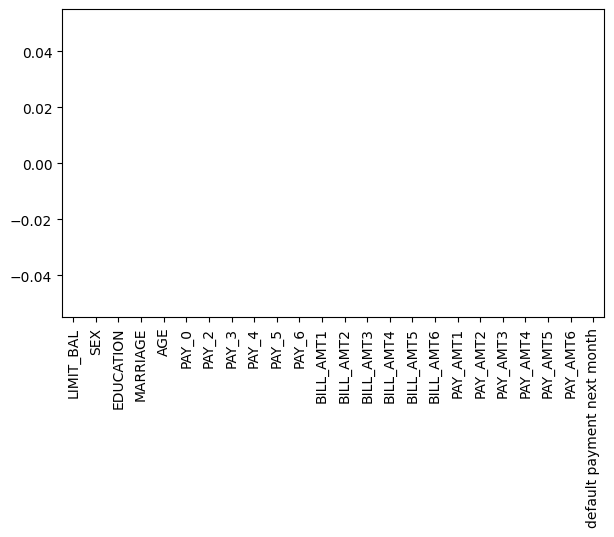

In [45]:
# check the null values by using visually representing 
col_null = df.isnull().sum()
col_null_frac = col_null / df.shape[0]

plt.figure(figsize= (7,4))
col_null_frac.plot(kind='bar')

## from above there is no values in a column ##

In [46]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [47]:
# check the zero values
(df==0).sum()

LIMIT_BAL                         0
SEX                               0
EDUCATION                        14
MARRIAGE                         54
AGE                               0
PAY_0                         14737
PAY_2                         15730
PAY_3                         15764
PAY_4                         16455
PAY_5                         16947
PAY_6                         16286
BILL_AMT1                      2008
BILL_AMT2                      2506
BILL_AMT3                      2870
BILL_AMT4                      3195
BILL_AMT5                      3506
BILL_AMT6                      4020
PAY_AMT1                       5249
PAY_AMT2                       5396
PAY_AMT3                       5968
PAY_AMT4                       6408
PAY_AMT5                       6703
PAY_AMT6                       7173
default payment next month    23364
dtype: int64

In [48]:
# find the unique values
for x in df.columns:
    print(x ,':', len(df[x].unique()))

LIMIT_BAL : 81
SEX : 2
EDUCATION : 7
MARRIAGE : 4
AGE : 56
PAY_0 : 11
PAY_2 : 11
PAY_3 : 11
PAY_4 : 11
PAY_5 : 10
PAY_6 : 10
BILL_AMT1 : 22723
BILL_AMT2 : 22346
BILL_AMT3 : 22026
BILL_AMT4 : 21548
BILL_AMT5 : 21010
BILL_AMT6 : 20604
PAY_AMT1 : 7943
PAY_AMT2 : 7899
PAY_AMT3 : 7518
PAY_AMT4 : 6937
PAY_AMT5 : 6897
PAY_AMT6 : 6939
default payment next month : 2


In [50]:

df[df.duplicated()]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1980,150000,2,1,1,38,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4585,150000,2,1,1,31,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6022,210000,2,1,2,39,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6466,210000,2,2,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
7319,500000,1,1,1,43,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
8320,360000,1,2,1,41,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
10250,50000,1,2,2,26,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
13106,360000,2,1,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
14294,20000,1,2,2,24,2,2,4,4,4,...,1650,1650,1650,0,0,0,0,0,0,1
15458,160000,1,2,2,28,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df = df.drop_duplicates()

In [61]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [23]:
## convert numerical data and categorical data
categorical_data = [x for x in df.columns if df[x].dtype =='O']
numerical_data=[y for y in df.columns if y not in categorical_data]

In [24]:
categorical_data

[]

In [25]:
numerical_data
    

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

## Outliers 
outlier is a data point and it is a extremely high or extremely low data point
to find outliers by using IQR Method

In [28]:
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers.shape[0]

In [29]:
outlier_counts = {}
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Check if the column contains numeric data
        outliers_count = count_outliers(df[column])
        outlier_counts[column] = outliers_count

In [30]:
outlier_counts

{'LIMIT_BAL': 167,
 'SEX': 0,
 'EDUCATION': 454,
 'MARRIAGE': 0,
 'AGE': 272,
 'PAY_0': 3130,
 'PAY_2': 4410,
 'PAY_3': 4209,
 'PAY_4': 3508,
 'PAY_5': 2968,
 'PAY_6': 3079,
 'BILL_AMT1': 2400,
 'BILL_AMT2': 2395,
 'BILL_AMT3': 2469,
 'BILL_AMT4': 2622,
 'BILL_AMT5': 2725,
 'BILL_AMT6': 2693,
 'PAY_AMT1': 2745,
 'PAY_AMT2': 2714,
 'PAY_AMT3': 2598,
 'PAY_AMT4': 2994,
 'PAY_AMT5': 2945,
 'PAY_AMT6': 2958,
 'default payment next month': 6636}

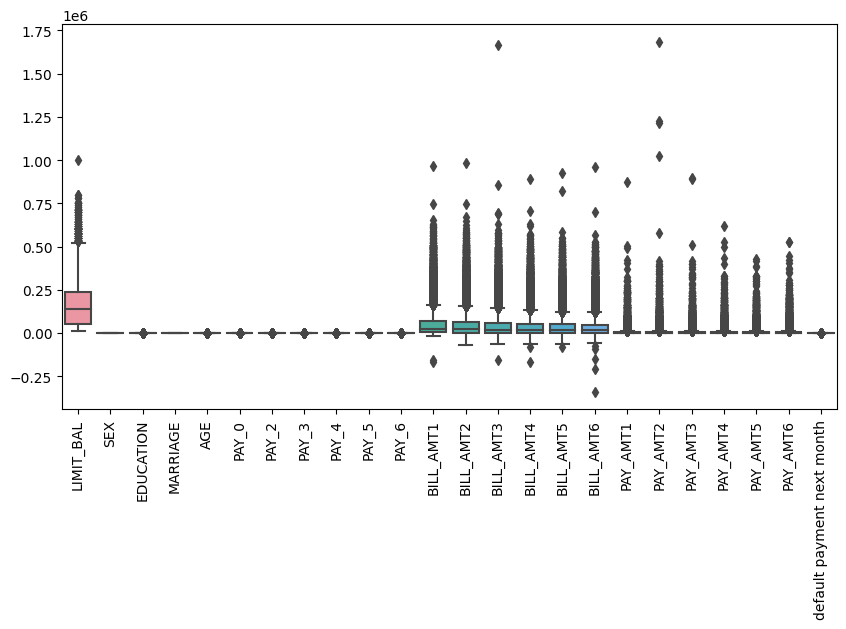

In [27]:
# 1.calculate Q1,Q3,IQR
# 2.find the Lower whishker and upper whisker as Q1-1.5*IQR and Q3+1.5*IQR
#3.data points greater than upper whisker  or less than lower whisker are outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

df["default payment next month

## Handling Outliers

In [16]:
def outliers_treat(k,i):
    Q1=k[i].quantile(0.25)
    Q3=k[i].quantile(0.75)
    IQR=Q3-Q1
    lower_whisker=Q1-1.5*IQR
    upper_whisker=Q3+1.5*IQR
    outlier=[x for x in k[i] if x<lower_whisker or x >upper_whisker]
    if len(outlier)>0:

        k.loc[(k[i]<lower_whisker)|(k[i]>upper_whisker),i]=k[i].median()
    else:
        pass

In [17]:
outliers_treat(df_train,"Avg_Account_Balance")

<AxesSubplot:xlabel='Avg_Account_Balance'>

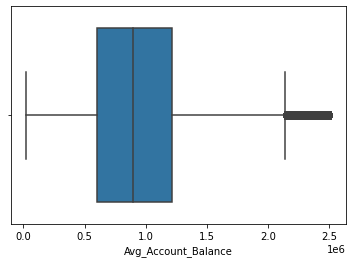

In [18]:
sns.boxplot(df_train['Avg_Account_Balance'])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Vintage'),
  Text(2, 0, 'Avg_Account_Balance'),
  Text(3, 0, 'Is_Lead')])

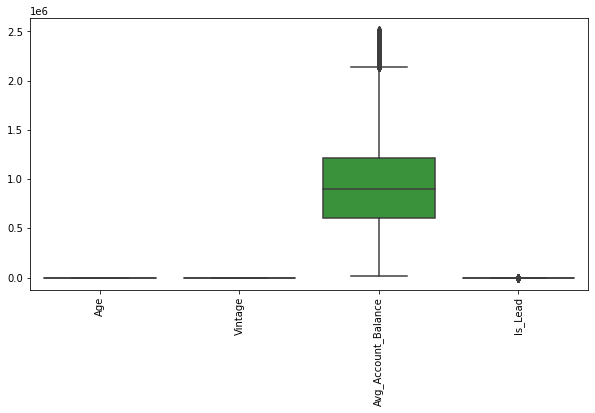

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_train)
plt.xticks(rotation=90)

In [20]:
# converting categorical values into numerical values
#df_train.Gender.replace(['Male', 'Female'], [0,1], inplace = True)
#df_train.Married.replace(['No','Yes'],[0,1],inplace=True)
#df_train.Education.replace(['Not Graduate','Graduate'],[0,1],inplace=True)
#df_train.Self_Employed.replace(['No','Yes'],[0,1],inplace=True)
#df_train.Loan_Status.replace(['N','Y'],[0,1],inplace=True)
#df_train.Property_Area.replace(['Urban','Rural','Semiurban'],[1,2,3],inplace=True)

In [ ]:
df["

## EDA

## correlation Heat map
correlation is a measure of how strongly one variable depends on another. 
Heatmap is a way to show some sort of matrix plot. To use a heatmap the data should be in a matrix form.

<Axes: >

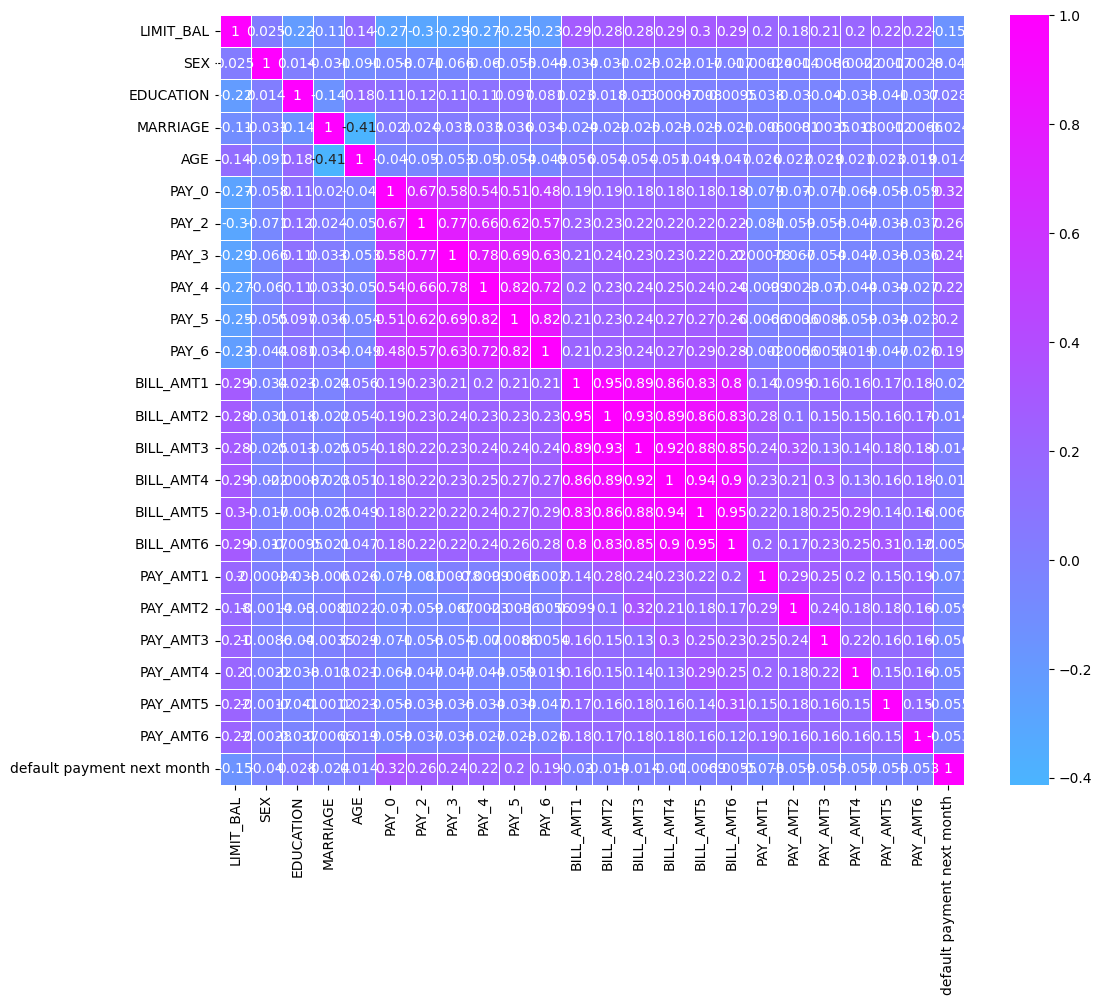

In [52]:
plt.figure(figsize=(12, 10))
corr=df.corr()
sns.heatmap(corr,cmap="cool", linewidths=.4,center=0,annot=True)

from above The heatmat shows that features are correlated with each other (collinearity), such us like PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6. In those cases, the correlation is positive

In [34]:
df["default payment next month"].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

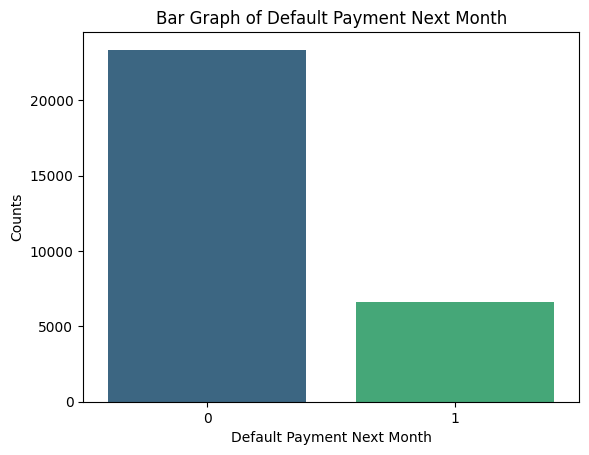

In [36]:
value_counts = df["default payment next month"].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Adding labels and title
plt.xlabel('Default Payment Next Month')
plt.ylabel('Counts')
plt.title('Bar Graph of Default Payment Next Month')

# Show the graph
plt.show()

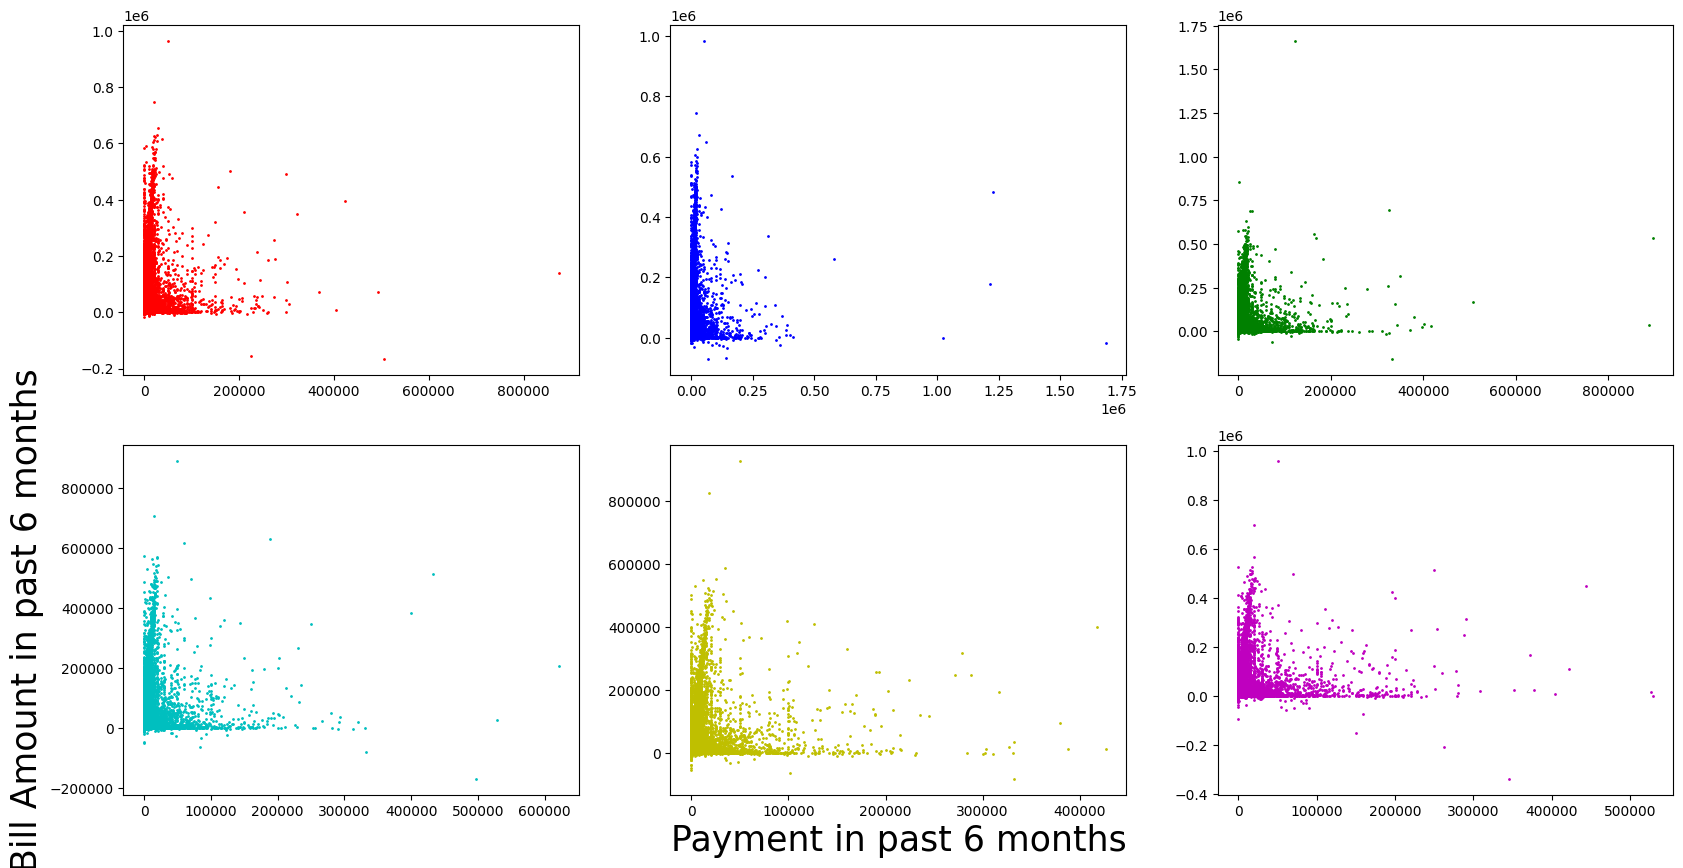

In [53]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.show()

<Axes: xlabel='PAY_6', ylabel='count'>

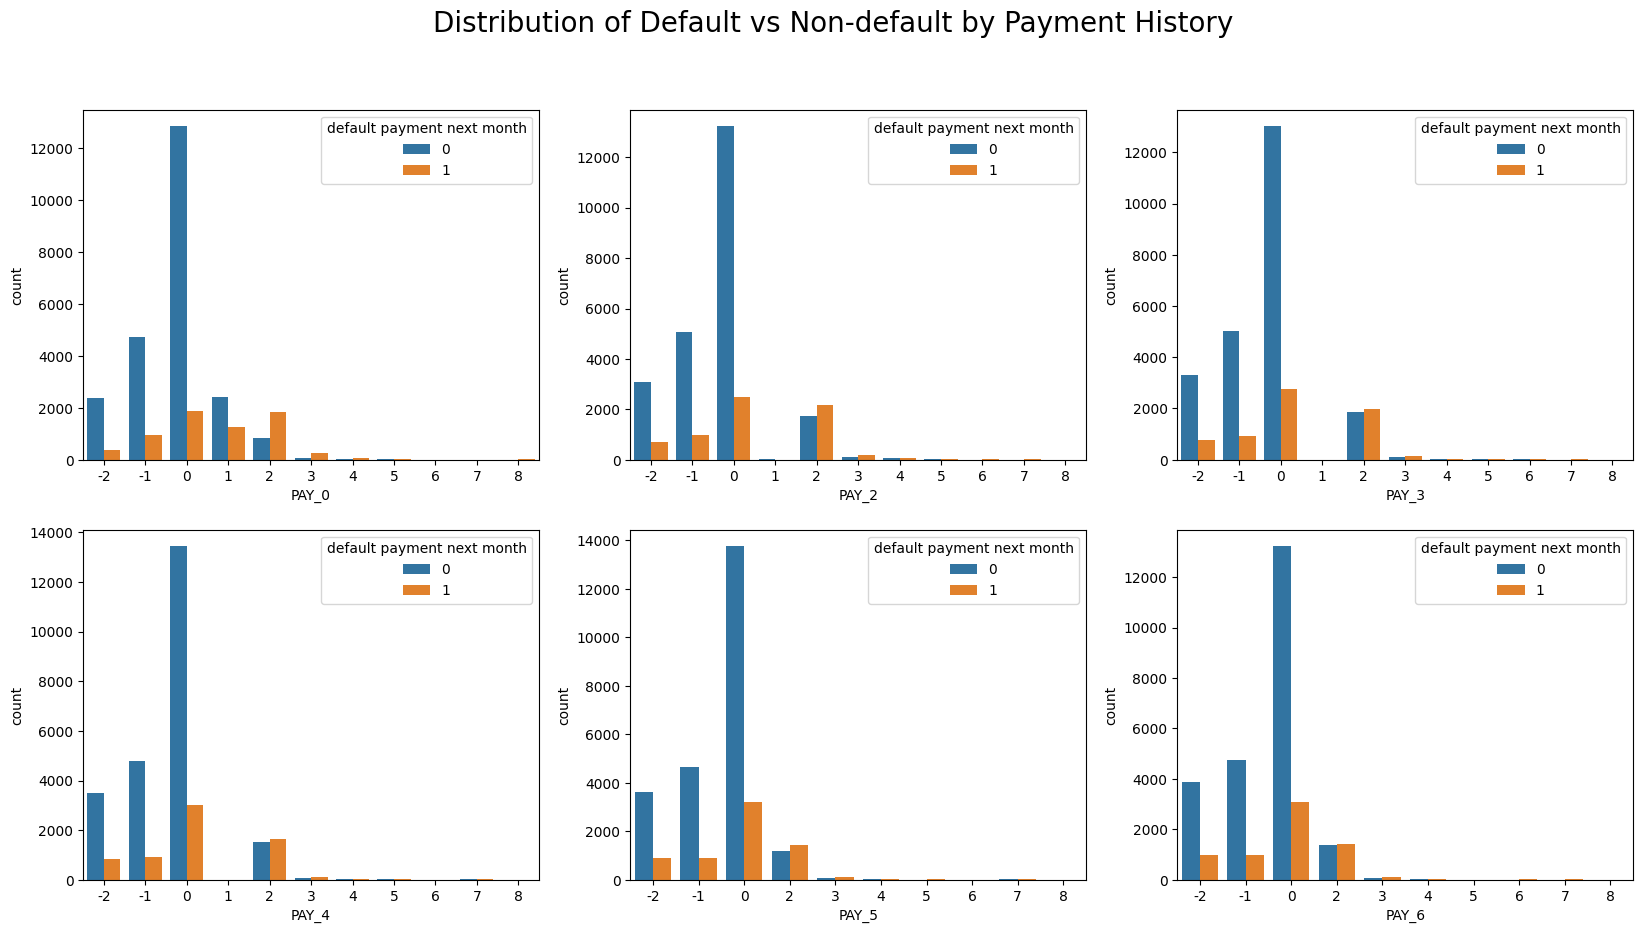

In [58]:
pay_hist = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']]

f, axes = plt.subplots(2, 3, figsize=(20, 10), facecolor='white')
f.suptitle('Distribution of Default vs Non-default by Payment History', size=20)
sns.countplot(x='PAY_0', hue="default payment next month", data=pay_hist, ax=axes[0,0])
sns.countplot(x="PAY_2", hue="default payment next month", data=pay_hist, ax=axes[0,1])
sns.countplot(x="PAY_3", hue="default payment next month", data=pay_hist, ax=axes[0,2])
sns.countplot(x="PAY_4", hue="default payment next month", data=pay_hist, ax=axes[1,0])
sns.countplot(x="PAY_5", hue="default payment next month", data=pay_hist, ax=axes[1,1])
sns.countplot(x="PAY_6", hue="default payment next month", data=pay_hist, ax=axes[1,2])

We can see that the dataset consists of 77% clients are not expected to default 
payment whereas 23% clients are expected to default the payment.

## Handling the imbalance data by using over sampling

In [63]:
df['default payment next month'].value_counts()

0    23335
1     6630
Name: default payment next month, dtype: int64

In [65]:
majority=df[df['default payment next month']==0]

In [67]:
minority=df[df['default payment next month']== 1]

In [68]:
df_oversampled=resample(minority,random_state=42,replace=True,n_samples= 187438)

In [69]:
df_oversampled1=pd.concat([majority, df_oversampled],axis=0)

In [70]:
df_oversampled1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6191,30000,1,1,2,30,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
1540,20000,1,2,2,22,1,2,0,0,0,...,9456,10150,10727,0,1300,800,1000,900,2130,1
27627,20000,2,2,1,24,1,2,3,2,0,...,20400,20000,20000,3200,0,0,0,0,0,1
24197,80000,1,2,2,30,2,2,2,2,2,...,70864,71902,73407,2500,3500,3000,2800,2800,0,1


## One Hot Encoding

In [30]:

dftrain = pd.get_dummies(df_oversampled1, columns =  ['Gender','Region_Code', 'Occupation', 'Channel_Code','Credit_Product', 'Is_Active'],drop_first=True)
 
 

In [31]:
dftrain.head(10)

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,...,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,26,21,894601,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,73,43,1045696,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,30,32,581988,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,56,26,1484315,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,34,19,470454,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,30,33,886787,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,56,32,544163,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8,48,13,444724,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
9,40,38,1274284,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
10,55,49,2014239,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0


## Standardization

In [71]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling= scaling.fit_transform(df)

In [72]:
scaling

array([[-1.13628477,  0.81015336,  0.18518609, ..., -0.31433077,
        -0.29356226,  1.87606179],
       [-0.3656192 ,  0.81015336,  0.18518609, ..., -0.31433077,
        -0.18111857,  1.87606179],
       [-0.59681887,  0.81015336,  0.18518609, ..., -0.24891194,
        -0.01245303, -0.53303148],
       ...,
       [-1.05921821, -1.23433421,  0.18518609, ..., -0.1834931 ,
        -0.11927454,  1.87606179],
       [-0.67388543, -1.23433421,  1.45037102, ...,  3.15051247,
        -0.19213805,  1.87606179],
       [-0.9050851 , -1.23433421,  0.18518609, ..., -0.24891194,
        -0.23734041,  1.87606179]])

### split the data into independent variables and dependent variable

In [73]:
## split the independent variables into x, split the dependent variable into y
x,y =dftrain.iloc[:,:-1],dftrain.iloc[:,-1]
print("shape of x:",x.shape)
print("shape of y:",y.shape)


NameError: name 'dftrain' is not defined

In [35]:
## split the data (70:30 )ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [36]:
print(" shape of x_train:",x_train.shape)
print(" shape of x_test:",x_test.shape)
print(" shape of y_train:",y_train.shape)
print(" shape of y_test:",y_test.shape)

 shape of x_train: (262413, 46)
 shape of x_test: (112463, 46)
 shape of y_train: (262413,)
 shape of y_test: (112463,)


 ### Model Development and Prediction by using logistic Regression

In [37]:
## def logistic regression and build the model for logistic Regression
logreg = LogisticRegression(random_state=2)
logreg.fit(x_train,y_train)

LogisticRegression(random_state=2)

In [38]:
# predict the test data 
y_pred=logreg.predict(x_test)

###  Model Evaluation using Confusion Matrix

In [39]:
#### Model Evaluation using Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix


array([[49250, 16985],
       [24670, 21558]], dtype=int64)

In [40]:
# number of correct predications by total number of predictions
Accuracy=(cnf_matrix[0][0]+cnf_matrix[1][1])/(cnf_matrix[0][0]+cnf_matrix[1][1]+cnf_matrix[0][1]+cnf_matrix[1][0])
Accuracy*100

62.961151667659585

In [43]:
cf=classification_report(y_test, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.67      0.74      0.70     66235
           1       0.56      0.47      0.51     46228

    accuracy                           0.63    112463
   macro avg       0.61      0.60      0.61    112463
weighted avg       0.62      0.63      0.62    112463



## Model Development  by using Random forest

In [44]:
classifier= RandomForestClassifier(random_state=3) 
classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=3)

In [2]:
y_pred1=classifier.predict(x_test)

NameError: name 'classifier' is not defined

In [46]:
cnf_matrix = confusion_matrix(y_test, y_pred1)
cnf_matrix

array([[57833,  8402],
       [10269, 35959]], dtype=int64)

In [47]:
accuracy=accuracy_score(y_test, y_pred1)
accuracy*100

83.39809537358953

## Model Development by using Decission Tree

In [48]:
dt = DecisionTreeClassifier(random_state=4)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=4)

In [49]:
y_pred2=dt.predict(x_test)

In [50]:
cnf_matrix = confusion_matrix(y_test, y_pred2)
cnf_matrix

array([[55051, 11184],
       [10911, 35317]], dtype=int64)

In [51]:
accuracy=accuracy_score(y_test, y_pred2)
accuracy*100

80.35353849710572

## Model Development by using  Gradient Boost

In [56]:
clf = GradientBoostingClassifier(random_state=5)
clf.fit(x_train, y_train)

GradientBoostingClassifier(random_state=5)

In [57]:
y_pred3=clf.predict(x_test)

In [58]:
cnf_matrix = confusion_matrix(y_test, y_pred3)
cnf_matrix

array([[47926, 18309],
       [20488, 25740]], dtype=int64)

In [59]:
accuracy=accuracy_score(y_test, y_pred3)
accuracy*100

65.50243191093959

## Model Development by using XGBoost 

In [60]:
xg_reg = xgb.XGBClassifier(random_state=5)
xg_reg.fit(x_train,y_train)

[18:02:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
y_pred4=xg_reg.predict(x_test)

In [62]:
cnf_matrix = confusion_matrix(y_test, y_pred4)
cnf_matrix

array([[50156, 16079],
       [18607, 27621]], dtype=int64)

In [63]:
accuracy=accuracy_score(y_test, y_pred4)
accuracy*100

69.15785636164783

In [ ]:
result = {'Algorithm': ['logistic', 'Randomforest', 'Decssiontree', 'Gradient','XGBoost'], 'Accuracy': [log_accuracy,Rf_accuracy,dt_accuracy,Gradient_accuracy,xg_accuracy,]}  

In [ ]:
df_S=pd.DataFrame(result)